# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
! pip install citipy

  Created wheel for citipy: filename=citipy-0.0.5-cp37-none-any.whl size=559708 sha256=7032aeda527fa04d52f68bc9f23764eb9feab041c141b6184c91b5739ca37590
  Stored in directory: C:\Users\Liu\AppData\Local\pip\Cache\wheels\6f\07\0d\0392639cf1c10376f59decd06775c0e085ca2458c6036c1028
Successfully built citipy


In [130]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import os

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# check if api_key works
api_key

'94cd4aeda13749b288b20f22a9a6f9d7'

## Generate Cities List

In [57]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

594

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [78]:
# Build query URL and request results in Celsius
url = "http://api.openweathermap.org/data/2.5/weather?"
query_url = f"{url}appid={api_key}&q={city}&units=metric"

# check if the url works
city = "London"
response = requests.get(query_url).json()
response

{'coord': {'lon': 116.4, 'lat': 39.91},
 'weather': [{'id': 701,
   'main': 'Mist',
   'description': 'mist',
   'icon': '50d'}],
 'base': 'stations',
 'main': {'temp': -1.2,
  'feels_like': -5.03,
  'temp_min': -6,
  'temp_max': 1.67,
  'pressure': 1019,
  'humidity': 85},
 'visibility': 5000,
 'wind': {'speed': 2, 'deg': 330},
 'clouds': {'all': 12},
 'dt': 1581293983,
 'sys': {'type': 1,
  'id': 9609,
  'country': 'CN',
  'sunrise': 1581290072,
  'sunset': 1581327769},
 'timezone': 28800,
 'id': 1816670,
 'name': 'Beijing',
 'cod': 200}

In [87]:
# Create empty lists to store the data of City weather 
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

# set up counter
counter = 1

# print title
print(f"Beginning Data Retrieval")
print(f"-------------------------------")

#Loop through the cities in the city list 
for city in cities:
    try:
        # find the API response
        query_url = f"{url}appid={api_key}&q={city}&units=metric"
        response = requests.get(query_url).json() 
        # find out all the needed data and add them into list
        city_name.append(response['name'])
        cloudiness.append(response['clouds']['all'])
        country.append(response['sys']["country"])
        date.append(response['dt'])
        humidity.append(response['main']['humidity'])
        max_temp.append(response['main']['temp_max'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        wind_speed.append(response['wind']['speed'])
        # print out the statement
        print(f"Processing Record {counter} | {city}")
        print(f"{url}&q={city}")
        counter += 1
    # if the city name doesn't exist, skip it
    except:
        print("City not found. Skipping...")
    continue

Beginning Data Retrieval
-------------------------------
Processing Record 1 | tiksi
http://api.openweathermap.org/data/2.5/weather?&q=tiksi
Processing Record 2 | butaritari
http://api.openweathermap.org/data/2.5/weather?&q=butaritari
Processing Record 3 | punta arenas
http://api.openweathermap.org/data/2.5/weather?&q=punta arenas
Processing Record 4 | badou
http://api.openweathermap.org/data/2.5/weather?&q=badou
Processing Record 5 | rikitea
http://api.openweathermap.org/data/2.5/weather?&q=rikitea
Processing Record 6 | swift current
http://api.openweathermap.org/data/2.5/weather?&q=swift current
Processing Record 7 | basoko
http://api.openweathermap.org/data/2.5/weather?&q=basoko
Processing Record 8 | tasiilaq
http://api.openweathermap.org/data/2.5/weather?&q=tasiilaq
Processing Record 9 | vallenar
http://api.openweathermap.org/data/2.5/weather?&q=vallenar
Processing Record 10 | vaini
http://api.openweathermap.org/data/2.5/weather?&q=vaini
City not found. Skipping...
Processing Recor

City not found. Skipping...
Processing Record 88 | naze
http://api.openweathermap.org/data/2.5/weather?&q=naze
Processing Record 89 | okhotsk
http://api.openweathermap.org/data/2.5/weather?&q=okhotsk
Processing Record 90 | ribeira grande
http://api.openweathermap.org/data/2.5/weather?&q=ribeira grande
Processing Record 91 | port lincoln
http://api.openweathermap.org/data/2.5/weather?&q=port lincoln
Processing Record 92 | dingle
http://api.openweathermap.org/data/2.5/weather?&q=dingle
Processing Record 93 | dikson
http://api.openweathermap.org/data/2.5/weather?&q=dikson
Processing Record 94 | ushuaia
http://api.openweathermap.org/data/2.5/weather?&q=ushuaia
Processing Record 95 | port elizabeth
http://api.openweathermap.org/data/2.5/weather?&q=port elizabeth
Processing Record 96 | fortuna
http://api.openweathermap.org/data/2.5/weather?&q=fortuna
Processing Record 97 | cidreira
http://api.openweathermap.org/data/2.5/weather?&q=cidreira
Processing Record 98 | esperance
http://api.openweat

Processing Record 174 | semey
http://api.openweathermap.org/data/2.5/weather?&q=semey
Processing Record 175 | dzilam gonzalez
http://api.openweathermap.org/data/2.5/weather?&q=dzilam gonzalez
Processing Record 176 | bengkulu
http://api.openweathermap.org/data/2.5/weather?&q=bengkulu
Processing Record 177 | lahij
http://api.openweathermap.org/data/2.5/weather?&q=lahij
Processing Record 178 | burnie
http://api.openweathermap.org/data/2.5/weather?&q=burnie
Processing Record 179 | manaia
http://api.openweathermap.org/data/2.5/weather?&q=manaia
City not found. Skipping...
Processing Record 180 | ust-nera
http://api.openweathermap.org/data/2.5/weather?&q=ust-nera
Processing Record 181 | ilulissat
http://api.openweathermap.org/data/2.5/weather?&q=ilulissat
City not found. Skipping...
Processing Record 182 | castro
http://api.openweathermap.org/data/2.5/weather?&q=castro
Processing Record 183 | luanda
http://api.openweathermap.org/data/2.5/weather?&q=luanda
Processing Record 184 | lebu
http://

City not found. Skipping...
Processing Record 260 | garowe
http://api.openweathermap.org/data/2.5/weather?&q=garowe
Processing Record 261 | hualmay
http://api.openweathermap.org/data/2.5/weather?&q=hualmay
City not found. Skipping...
Processing Record 262 | faya
http://api.openweathermap.org/data/2.5/weather?&q=faya
Processing Record 263 | soe
http://api.openweathermap.org/data/2.5/weather?&q=soe
Processing Record 264 | tiznit
http://api.openweathermap.org/data/2.5/weather?&q=tiznit
Processing Record 265 | lichinga
http://api.openweathermap.org/data/2.5/weather?&q=lichinga
Processing Record 266 | caucaia
http://api.openweathermap.org/data/2.5/weather?&q=caucaia
Processing Record 267 | churapcha
http://api.openweathermap.org/data/2.5/weather?&q=churapcha
Processing Record 268 | morondava
http://api.openweathermap.org/data/2.5/weather?&q=morondava
Processing Record 269 | saldanha
http://api.openweathermap.org/data/2.5/weather?&q=saldanha
Processing Record 270 | salinas
http://api.openwea

Processing Record 349 | lukovetskiy
http://api.openweathermap.org/data/2.5/weather?&q=lukovetskiy
Processing Record 350 | salalah
http://api.openweathermap.org/data/2.5/weather?&q=salalah
Processing Record 351 | salinopolis
http://api.openweathermap.org/data/2.5/weather?&q=salinopolis
Processing Record 352 | perevolotskiy
http://api.openweathermap.org/data/2.5/weather?&q=perevolotskiy
Processing Record 353 | waitati
http://api.openweathermap.org/data/2.5/weather?&q=waitati
Processing Record 354 | tomra
http://api.openweathermap.org/data/2.5/weather?&q=tomra
Processing Record 355 | kafue
http://api.openweathermap.org/data/2.5/weather?&q=kafue
Processing Record 356 | agadez
http://api.openweathermap.org/data/2.5/weather?&q=agadez
Processing Record 357 | kununurra
http://api.openweathermap.org/data/2.5/weather?&q=kununurra
Processing Record 358 | san patricio
http://api.openweathermap.org/data/2.5/weather?&q=san patricio
City not found. Skipping...
Processing Record 359 | muzhi
http://api

Processing Record 435 | diamantino
http://api.openweathermap.org/data/2.5/weather?&q=diamantino
Processing Record 436 | nizhniy kuranakh
http://api.openweathermap.org/data/2.5/weather?&q=nizhniy kuranakh
Processing Record 437 | awjilah
http://api.openweathermap.org/data/2.5/weather?&q=awjilah
Processing Record 438 | tateyama
http://api.openweathermap.org/data/2.5/weather?&q=tateyama
Processing Record 439 | sao jose da coroa grande
http://api.openweathermap.org/data/2.5/weather?&q=sao jose da coroa grande
Processing Record 440 | cayenne
http://api.openweathermap.org/data/2.5/weather?&q=cayenne
Processing Record 441 | ewo
http://api.openweathermap.org/data/2.5/weather?&q=ewo
Processing Record 442 | seoul
http://api.openweathermap.org/data/2.5/weather?&q=seoul
Processing Record 443 | moerai
http://api.openweathermap.org/data/2.5/weather?&q=moerai
Processing Record 444 | maningrida
http://api.openweathermap.org/data/2.5/weather?&q=maningrida
Processing Record 445 | prince rupert
http://api

Processing Record 522 | zaysan
http://api.openweathermap.org/data/2.5/weather?&q=zaysan
Processing Record 523 | arboledas
http://api.openweathermap.org/data/2.5/weather?&q=arboledas
City not found. Skipping...
Processing Record 524 | dong xoai
http://api.openweathermap.org/data/2.5/weather?&q=dong xoai
Processing Record 525 | de-kastri
http://api.openweathermap.org/data/2.5/weather?&q=de-kastri
Processing Record 526 | flinders
http://api.openweathermap.org/data/2.5/weather?&q=flinders
City not found. Skipping...
Processing Record 527 | surab
http://api.openweathermap.org/data/2.5/weather?&q=surab
Processing Record 528 | vilhena
http://api.openweathermap.org/data/2.5/weather?&q=vilhena
Processing Record 529 | kasongo-lunda
http://api.openweathermap.org/data/2.5/weather?&q=kasongo-lunda
Processing Record 530 | sao miguel do tapuio
http://api.openweathermap.org/data/2.5/weather?&q=sao miguel do tapuio
Processing Record 531 | eureka
http://api.openweathermap.org/data/2.5/weather?&q=eureka


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [101]:
# Display the DataFrame
city_weather_dict = {'City':city_name,
                    'Cloudiness':cloudiness,
                    'Country':country,
                    'Date':date,
                    'Humidity':humidity,
                    'Lat':lat,
                    'Lng':lng,
                    'Max Temp':max_temp,
                    'Wind Speed':wind_speed}
df_city_weather = pd.DataFrame(city_weather_dict)
df_city_weather

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Tiksi,100,RU,1581296053,84,71.69,128.87,-21.74,7.00
1,Butaritari,70,KI,1581296053,80,3.07,172.79,29.06,7.30
2,Punta Arenas,84,CL,1581296054,59,-53.15,-70.92,17.00,8.70
3,Badou,41,TG,1581296054,68,7.58,0.60,23.43,1.14
4,Rikitea,11,PF,1581296054,77,-23.12,-134.97,25.52,6.97
...,...,...,...,...,...,...,...,...,...
537,Ndende,34,GA,1581296188,98,-2.40,11.36,22.93,0.92
538,Phan Thiet,90,VN,1581296188,64,10.93,108.10,21.53,1.89
539,Samorin,33,SK,1581296188,86,48.03,17.31,5.00,5.70
540,Raudeberg,100,NO,1581296188,86,61.99,5.14,5.00,12.90


In [144]:
# check if there is NA in the dateframe
df_city_weather.count()

City          542
Cloudiness    542
Country       542
Date          542
Humidity      542
Lat           542
Lng           542
Max Temp      542
Wind Speed    542
dtype: int64

In [135]:
# export data as csv file
output_path = os.path.join('city_weather.csv')
df_city_weather.to_csv(output_path)

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

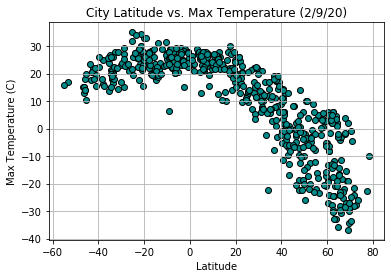

In [140]:
# prepare to plot
fig1,ax1=plt.subplots()

# set up x and y, then plot
ax1.scatter(df_city_weather['Lat'], df_city_weather['Max Temp'], c='darkcyan', edgecolors='black')

# set up label, title and grid
ax1.set(xlabel='Latitude', ylabel='Max Temperature (C)', title='City Latitude vs. Max Temperature (2/9/20)')
ax1.grid()

# save the fig
fig1_save_path = os.path.join('City_Latitude_vs_Max_Temperature.png')
fig1.savefig(fig1_save_path)

#### Latitude vs. Humidity Plot

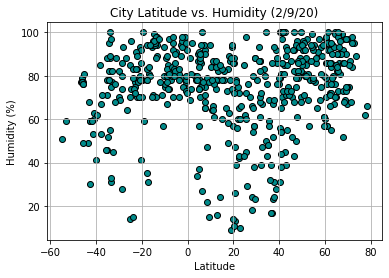

In [143]:
# prepare to plot
fig2,ax2=plt.subplots()

# set up x and y, then plot
ax2.scatter(df_city_weather['Lat'], df_city_weather['Humidity'], c='darkcyan', edgecolors='black')

# set up label, title and grid
ax2.set(xlabel='Latitude', ylabel='Humidity (%)', title='City Latitude vs. Humidity (2/9/20)')
ax2.grid()

# save the fig
fig2_save_path = os.path.join('City_Latitude_vs_Humidity.png')
fig2.savefig(fig2_save_path)

#### Latitude vs. Cloudiness Plot

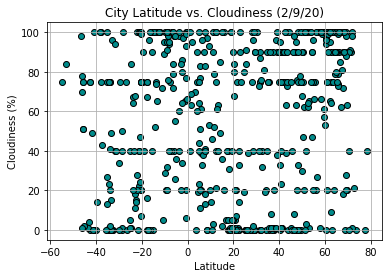

In [142]:
# prepare to plot
fig3,ax3=plt.subplots()

# set up x and y, then plot
ax3.scatter(df_city_weather['Lat'], df_city_weather['Cloudiness'], c='darkcyan', edgecolors='black')

# set up label, title and grid
ax3.set(xlabel='Latitude', ylabel='Cloudiness (%)', title='City Latitude vs. Cloudiness (2/9/20)')
ax3.grid()

# save the fig
fig3_save_path = os.path.join('City_Latitude_vs_Cloudiness.png')
fig3.savefig(fig3_save_path)

#### Latitude vs. Wind Speed Plot

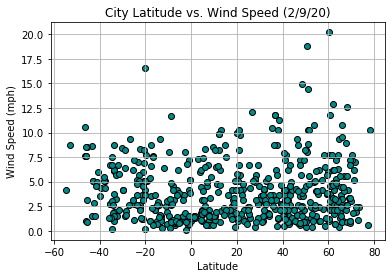

In [141]:
# prepare to plot
fig4,ax4=plt.subplots()

# set up x and y, then plot
ax4.scatter(df_city_weather['Lat'], df_city_weather['Wind Speed'], c='darkcyan', edgecolors='black')

# set up label, title and grid
ax4.set(xlabel='Latitude', ylabel='Wind Speed (mph)', title='City Latitude vs. Wind Speed (2/9/20)')
ax4.grid()

# save the fig
fig4_save_path = os.path.join('City_Latitude_vs_Wind_Speed.png')
fig4.savefig(fig4_save_path)